# Milestone 2

================================================

Nama : Angga Fadhlurrahman Prianto

Objective : Program ini dibuat untuk memprediksi harga mobil di pasar `Amerika`.

================================================

Link DataSet    : [DataSet](https://www.kaggle.com/datasets/zafarali27/car-price-prediction/data)

Link Hugging Face   : [Hugging Face](https://huggingface.co/spaces/angga770773/Project_Predict_Price_Car)

Link Acuan Measurable : [Link 1](https://www.sciencedirect.com/science/article/pii/S0957417424025077), [Link 2](https://www.researchgate.net/publication/386117316_Predicting_Vehicle_Prices_Using_Machine_Learning_A_Case_Study_with_Linear_Regression)

# Busines UnderStanding
Sebuah perusahaan mobil yang berada diluar amerika berencana untuk mengembangkan market mereka dipasar amerika dan memproduksi mobil disana untuk bersaing dengan perusahaan - perusahaan besar dari eropa. Dalam rangka untuk mengoptimalkan pengembangan product dan strategi pemasaran, perusahaan perlu memahami fator - faktor apa saja yang mempengaruhi harga di pasar amerika. Untuk memahami harga pasar sangat penting agar perusahaan dapat menyesuaikan harga product dengan trend pasar yang ada di amerika, hal ini perlu dilakukan karena jika tidak kita akan kesulitan dalam menentukan harga product yang akan kita jual disana.

# Problem Statement

Untuk menentukan problem statement saya membuatnya dengan metode SMART :

`Spesific`    : Mengembangkan model prediksi harga mobil dengan tujuan untuk mengetahui faktor - faktor apa saja yang mempengaruhi harga mobil dipasar AS.

`Measurable`  : Model prediksi harga yang akan dibuat akan di evaluasi dengan menggunakan matrik `Mean Squared Error (MSE)`, `Mean Absolute Error` atau R-squared. Model akan dianggap berhasil atau akurat jika MSE atau MAE nya kurang dari `5%` dan R-squared nya sekitar `0.070`.

`Achievable`  : Model yang akan digunakan untuk prediksi harga menggunakan algoritma seperti `Decision Tree`, `Random Forest`, `KNN`, `SVM`, dan `Boosting`. Dari kelima algoritma ini akan di implementasikan dan akan dipilih salah satu algoritma yang terbaik untuk melakukan predict.

`Relevant`    : Tujuan ini relevan karena memberikan wawasan penting bagi perusahaan dalam memahami faktor - faktor yang mempengaruhi harga mobil di pasar AS. Dalam hal ini juga akan mendukung keputusan yang akan diambil oleh perusahaan untuk menentukan harga yang dapat bersaing dengan perusahaan - perusahaan besar di eropa.

`Time-Bounnd` : Membangun dan mengimplementasikan mobel prediksi dalam kurun waktu 3 bulan kedepan.


**Ringkasan Problem Statement**
Sebuah perusahaan mobil ingin mengembangkan model prediksi. Untuk model prediksi yang dibuat akan dilakukan evaluasi dngan `MSE`, `MAE`, dan `R-Squared`, Model akan dianggap berhasil jika MSE atau MAE nya kurang dari 5% dan R-Squared nya `0.070`. Lalu untuk algoritma model yang akan digunakan degan membandingkan model yang paling bagus dari algoritma `Decision Tree`, `Random Forest`, `KNN`, `SVM`, dan `Boosting`. Tujuan model prediksi ini dibuat untuk mengetahui harga kendaraan yang di jual oleh perusahaan - perusahaan besar di eropa. Lalu untuk membangun sebuah model prediksi ini membutuhkan waktu sekitar 3 bulan kedepan.

## Penjabaran masalah
Pada penjabaran masalah saya menggunakan metode 5W+1H, penggunaan metode ini terbilang berguna untuk mengidentifikasi masalah atau case yang sedang di hadapi, Berikut adalah penjabaran masalah yang telah saya buat :

1. Apa yang mempengaruhi harga mobil dipasar Amerika Serikat ?
2. Bagaimana Perbandingan harga berdasarkan jenis bahan bakar ?
3. Bagaimana distribusi jumlah mobil berdasarkan brand ?
4. Bagaimana hubungan antara tahun produksi dengan harga mobil ?
5. Bagaimana perbandingan harga berdasarkan kondisi kendaraan ?
6. Bagaimana Perbandingan harga berdasarkan Transmisi

# Import Libraries

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr, chi2_contingency
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import joblib


# Data Loading

In [2]:
data_df = pd.read_csv('car_price_prediction_.csv')

data_df

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Audi,2020,2.4,Petrol,Automatic,22650,Like New,61384.10,Q5
2496,2497,Audi,2001,5.7,Hybrid,Manual,77701,Like New,24710.35,A3
2497,2498,Ford,2021,1.1,Hybrid,Manual,272827,Like New,29902.45,Fiesta
2498,2499,Audi,2002,4.5,Diesel,Manual,229164,Like New,46085.67,Q5


In [3]:
data_df.isnull().sum()

Car ID          0
Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


In [5]:
data = data_df.drop(columns=['Car ID'])
data

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang
...,...,...,...,...,...,...,...,...,...
2495,Audi,2020,2.4,Petrol,Automatic,22650,Like New,61384.10,Q5
2496,Audi,2001,5.7,Hybrid,Manual,77701,Like New,24710.35,A3
2497,Ford,2021,1.1,Hybrid,Manual,272827,Like New,29902.45,Fiesta
2498,Audi,2002,4.5,Diesel,Manual,229164,Like New,46085.67,Q5


Dari hasil data loading didapatkan informasi mengenai jumlah data yang ada yaitu sebanyak `2500 data` dengan `10 column` dan pada dataset ini juga tidak terdapat `missing values`, yang artinya data ini sudah bersih dari `missing values`.

# Exploratory Data Analysis (EDA)

## 1. Apa yang mempengaruhi harga mobil dipasar Amerika Serikat ?

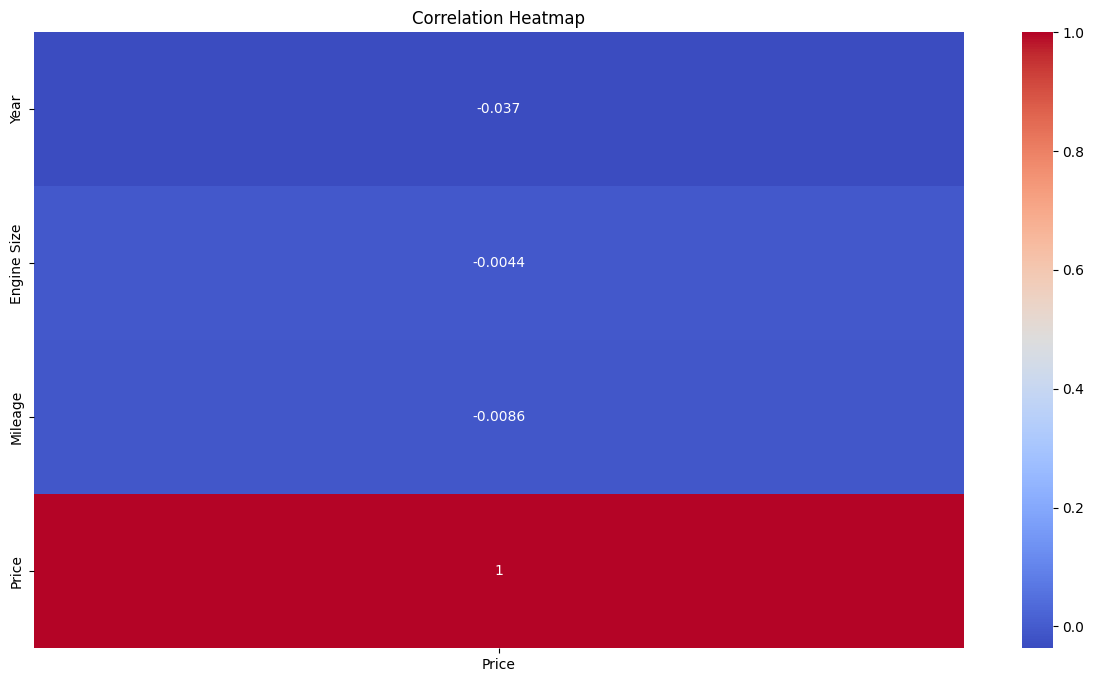

In [8]:
correlation_matrix = data[['Year', 'Engine Size', 'Mileage', 'Price']].corr(method='pearson')

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix[['Price']], annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Dari hasil pengecekan corelasi diatas dapat dilihat dari hasil chart heatmap pada feature `Year`, `Engine Size`, `Mileage` dari ketiga feature ini memiliki korelasi negatif yang artinya dari ketiga feature ini memiliki korelasi akan tetapi korelasinya lemah

## 2. Bagaimana Perbandingan harga berdasarkan jenis bahan bakar ?

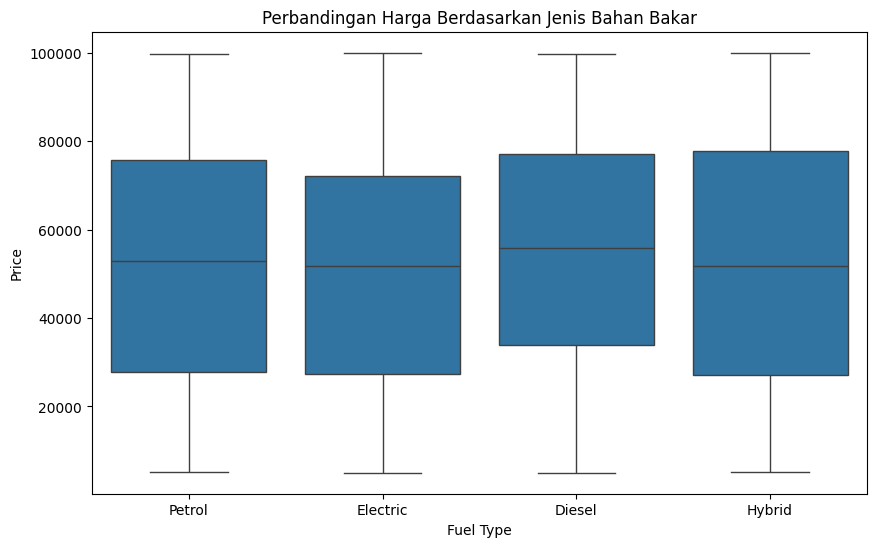

In [9]:
# Visualisasi hubungan harga berdasarkan jenis bahan bakar
plt.figure(figsize=(10,6))
sns.boxplot(x='Fuel Type', y='Price', data=data)
plt.title('Perbandingan Harga Berdasarkan Jenis Bahan Bakar')
plt.show()

Dari hasil chart diatas secara keseluruhan pada semua jenis bahan bakar memiliki rentang harga yang sama yang hampir mirip, akan tetapi pada jenis bahan bakar `Hybrid` memiliki rentang harga yang lebar, yang artinya pada jenis bahan bakar ini memiliki variansi harga yang lebih tinggi. Maka harga kendaraan berdasarkan jenis bahan bakar tidak menunjukkan perbedaan harga yang signifikan berdasarkan hasil dari statistik.

## 3. Bagaimana distribusi jumlah mobil berdasarkan brand ?

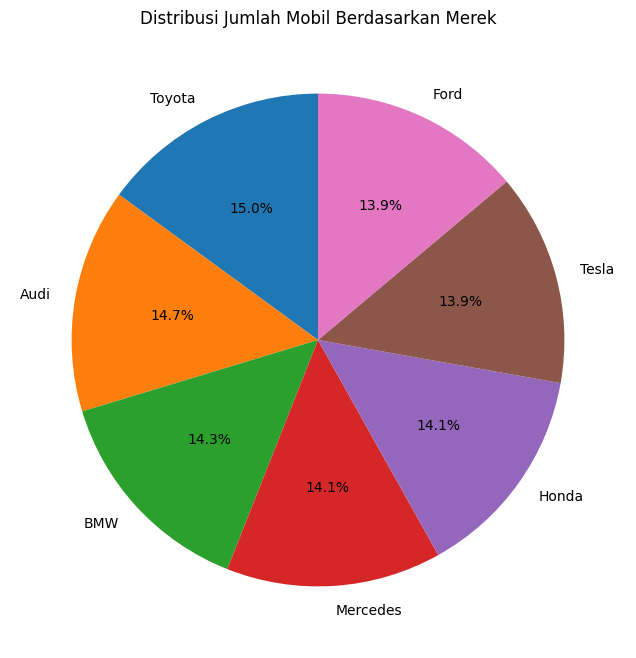

In [10]:
# Menghitung jumlah mobil per merek
brand_counts = data['Brand'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8,8))
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Jumlah Mobil Berdasarkan Merek')
plt.show()

Dari hasil pengecekan distribusi jumlah kendaraan berdasarkan `Brand` didapatkan hasil pada `Brand Toyota` memiliki jumlah distribusi yang paling besar yaitu `15.0%` dari pada brand lainnya. Sedangkan berdasarkan hasil pengecekan distribusi yang paling kecil pada `Brand Tesla dan Ford`. Hal ini juga dapat diartikan dinegara `Amerika Serikat` penjualan kendaraan didominasi pada `Brand` `Toyota`.

## 4. Bagaimana hubungan antara tahun produksi dengan harga mobil ?

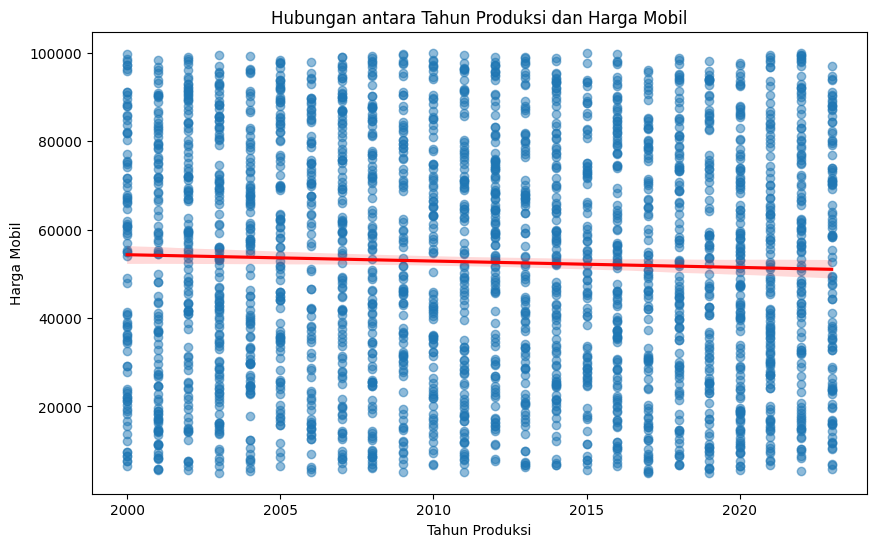

In [11]:
plt.figure(figsize=(10,6))
sns.regplot(x='Year', y='Price', data=data, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title('Hubungan antara Tahun Produksi dan Harga Mobil')
plt.xlabel('Tahun Produksi')
plt.ylabel('Harga Mobil')
plt.show()

Dari hasil diatas dapat diketahui hubungan antara `Year` dengan `Price` terbilang lemah dapat dilihat dari garis reggresi nya terlihat menurun dari kiri ke kanan. Akan tetapi jika kita lihat dari persebaran datanya cukup merata disepanjang tahun dari harun 2000 sampai dengan tahun 2020, dari hasil chart ini dapat disimpulkan bahwa `Year` bukan penentu utama dari `Price`.

## 5. Bagaimana perbandingan harga berdasarkan kondisi kendaraan ?

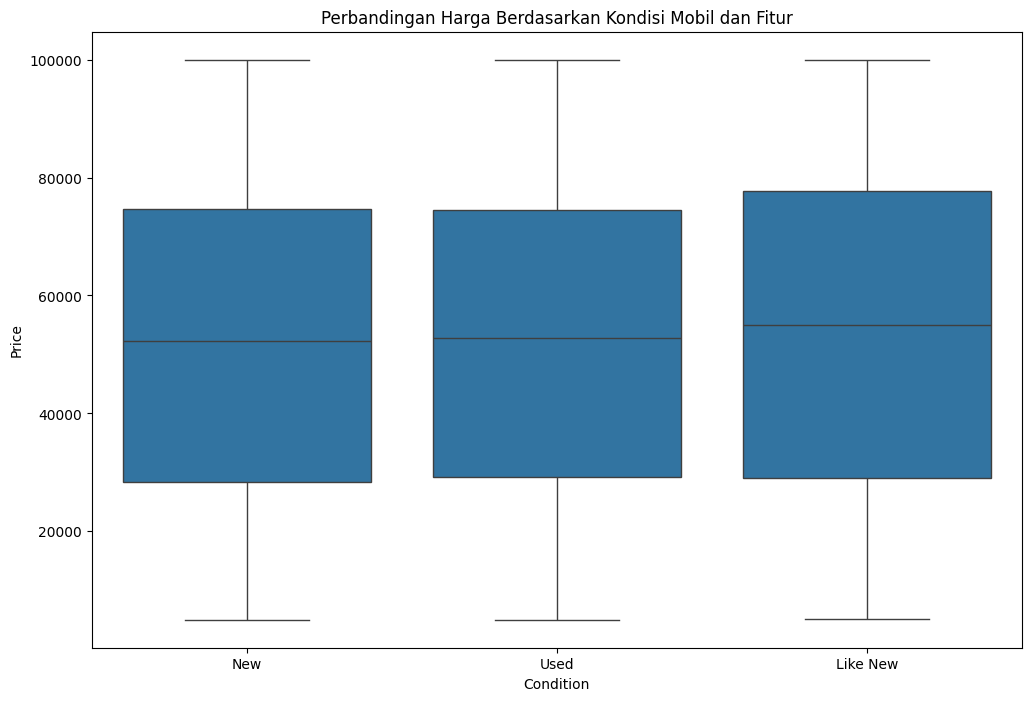

In [ ]:
# Perbandingan harga berdasarkan kondisi mobil dan fitur
plt.figure(figsize=(12,8))
sns.boxplot(x='Condition', y='Price', data=data)
plt.title('Perbandingan Harga Berdasarkan Kondisi Mobil')
plt.show()

Berdasarkan dari analisi diatas perbandingan antara harga dengan kondisi kendaraan, kondisi kendaraan memiliki harga yang hampir serupa. Meskipun pada kondisi kendaraan `Used` memiliki variasi harga yang lebih lebar, namun harga median tetap konsisten di harga yang sama. Hal ini menunjukkan meskipun kondisi kendaraan berbeda harga kendaraan tidak begitu menunnjukan perbedaan yang drastis. 

## 6. Bagaimana Perbandingan harga berdasarkan Transmisi

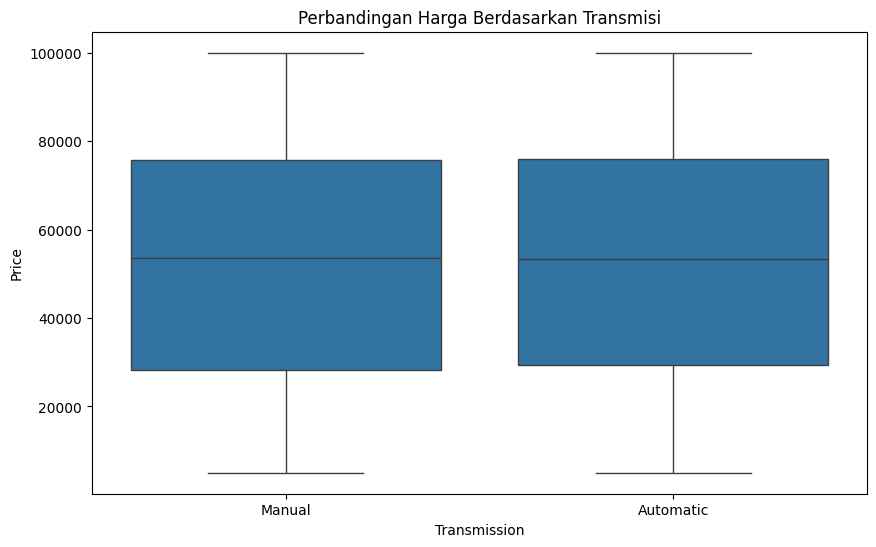

In [13]:
# Perbandingan harga mobil berdasarkan transmisi
plt.figure(figsize=(10,6))
sns.boxplot(x='Transmission', y='Price', data=data)
plt.title('Perbandingan Harga Berdasarkan Transmisi')
plt.show()


Berdasarkan dari kedua jenis transmisi secara statistik memiliki harga yang hampir setara dengan median yang terpusat pada angka yang sama. Lalu dari rentang harga nya pun sama, akan tetapi ada sedikit variasi di kedua kategori. Hal ini mengindikasikan bahwa perbedaan jenis transmisi tidak memengaruhi harga kendaraan secara signifikan.

# Feature Enginering

In [14]:
categorical_columns = ['Brand', 'Fuel Type', 'Transmission', 'Condition', 'Model']
numeric_columns = ['Year', 'Engine Size', 'Mileage']

## Check Cardinality

In [15]:
# cat_cols = list(data.select_dtypes(include='object').columns)
listItem = []
for col in categorical_columns:
  listItem.append([col, data[col].nunique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique
0,Brand,7
1,Fuel Type,4
2,Transmission,2
3,Condition,3
4,Model,28


Dari hasil diatas didapatkan bahwa jumlah nilai unique paling banyak terdapat pada column `model` dengan jumlah nilai unique sebanyak 28, maka column `model` merupakan *low cardinality*. Karena pada column model merupakan *low cardinality* maka saya tidak melakukan drop pada column `model` karena tidak akan memberatkan proses modeling dan encoding.

## Split Antara x(feature) dan y(feature)

In [16]:
# Spltting data
'''
Pada script ini saya melakukan splitting data
dengan memisahkan data menjadi dua bagian yaitu x(Feature) dan y(Target)
'''
x = data.drop(columns=['Price'])
y = data['Price']

x

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Model
0,Tesla,2016,2.3,Petrol,Manual,114832,New,Model X
1,BMW,2018,4.4,Electric,Manual,143190,Used,5 Series
2,Audi,2013,4.5,Electric,Manual,181601,New,A4
3,Tesla,2011,4.1,Diesel,Automatic,68682,New,Model Y
4,Ford,2009,2.6,Diesel,Manual,223009,Like New,Mustang
...,...,...,...,...,...,...,...,...
2495,Audi,2020,2.4,Petrol,Automatic,22650,Like New,Q5
2496,Audi,2001,5.7,Hybrid,Manual,77701,Like New,A3
2497,Ford,2021,1.1,Hybrid,Manual,272827,Like New,Fiesta
2498,Audi,2002,4.5,Diesel,Manual,229164,Like New,Q5


## Splitting antara Train Set dan Test Set

In [17]:
# Splitting data train set & test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"Train Size: {x_train.shape}")
print(f"Test Size: {x_test.shape}")

Train Size: (2000, 8)
Test Size: (500, 8)


In [18]:
x_train.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Year,2000.0,2011.54,6.96,2000.0,2005.00,2012.0,2018.00,2023.0
Engine Size,2000.0,3.46,1.43,1.0,2.20,3.4,4.70,6.0
Mileage,2000.0,150953.13,87835.51,36.0,73006.25,152234.5,226668.75,299967.0


## Handling Outlier

In [19]:
listItem = []

for col in numeric_columns:
    listItem.append([col, round(x_train[col].skew(),1), np.where(
        (round(x_train[col].skew(),1) <= 0.5) & (round(x_train[col].skew(),1) >= -0.5),
        'normal', 'skewed')])
    
skewnes = pd.DataFrame(columns=['Nama Column', 'Skewnes', 'Distribution'], data=listItem)

skewnes

,Nama Column,Skewnes,Distribution
0,Year,-0.0,normal
1,Engine Size,0.1,normal
2,Mileage,-0.0,normal


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         2500 non-null   object 
 1   Year          2500 non-null   int64  
 2   Engine Size   2500 non-null   float64
 3   Fuel Type     2500 non-null   object 
 4   Transmission  2500 non-null   object 
 5   Mileage       2500 non-null   int64  
 6   Condition     2500 non-null   object 
 7   Price         2500 non-null   float64
 8   Model         2500 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 175.9+ KB


Dari pengecekan distribusi data numerik diatas dapat disimpulkan bahwa semua data numeric terdistribusi normal yang menandakan bahwa tidak terdapatnya `outlier`. Akan tetapi agar lebih pasti saya akan melakukan pengecekan kembali dengan mengecek `upper boundary`, `lower boundary` dan `persentase outlier` pada setiap column numeric.

In [21]:
# cek upper, lower boundaries dan persentase outliers

column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

for row in range (0, len(skewnes)):
  col = skewnes['Nama Column'][row]
  #checking upper and lower boundary
  if skewnes['Distribution'][row] == 'skewed':
    IQR = x_train[col].quantile(0.75) - x_train[col].quantile(0.25)
    lower_boundary = x_train[col].quantile(0.25) - (IQR * 3)
    upper_boundary = x_train[col].quantile(0.75) + (IQR * 3)
  else:
    lower_boundary = x_train[col].mean() - 3* x_train[col].std()
    upper_boundary = x_train[col].mean() + 3* x_train[col].std()
  #append to list
  column.append(col)
  lower_bound.append(lower_boundary)
  upper_bound.append(upper_boundary)
  totout = ((len(x_train[x_train[col] > upper_boundary]) / len(x_train) * 100) + (len(x_train[x_train[col] < lower_boundary]) / len(x_train) * 100))
  percent_total_outlier.append(totout)

outliers = pd.DataFrame({
    'column': column,
    #round the value
    'upper_boundary': [round(upper_bound,2) for upper_bound in upper_bound],
    'lower_boundary': [round(lower_bound,2) for lower_bound in lower_bound],
    'percentage_total_outlier': [round(percent_total_outlier,2) for percent_total_outlier in percent_total_outlier]
})
outliers


,column,upper_boundary,lower_boundary,percentage_total_outlier
0,Year,2032.43,1990.66,0.0
1,Engine Size,7.74,-0.82,0.0
2,Mileage,414459.65,-112553.39,0.0


## Handling Missing Value

In [22]:
# Check Missing Value
print("Check Missing Value Data Train:")
x_train.isnull().sum()

Check Missing Value Data Train:


Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Model           0
dtype: int64

In [23]:
print("Check Missing value Data Test:")
x_test.isnull().sum()

Check Missing value Data Test:


Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Model           0
dtype: int64

Dari hasil diatas dapat diketahui bahwa tidak terdapat missing value pada data train dan data test. Artinya pada step ini kita tidak perlu melakukan handling missing value dan dapat dikatakan juga bahwa pada dataset ini sangat bersih dari missing value.

## Split Between Numeric Columns and Categorical Columns

In [24]:
x_train

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Model
2055,Mercedes,2005,3.4,Electric,Automatic,73401,New,C-Class
1961,BMW,2004,1.6,Diesel,Manual,252234,New,5 Series
1864,Tesla,2002,5.8,Diesel,Manual,89882,Like New,Model X
2326,Mercedes,2000,4.6,Diesel,Manual,275333,New,GLC
461,Honda,2010,3.2,Diesel,Manual,41190,Like New,CR-V
...,...,...,...,...,...,...,...,...
1638,Honda,2018,4.9,Petrol,Manual,69072,Used,Accord
1095,Mercedes,2005,2.9,Petrol,Manual,127521,Like New,GLA
1130,Toyota,2014,3.2,Diesel,Manual,80636,Like New,RAV4
1294,Ford,2011,4.8,Petrol,Manual,6336,Used,Explorer


In [25]:
cat_columns = ['Brand', 'Fuel Type', 'Transmission', 'Condition', 'Model']
num_columns = ['Year', 'Engine Size', 'Mileage']

print(f"Numerical columns: {num_columns}")
print(f"Categorical columns: {cat_columns}")

Numerical columns: ['Year', 'Engine Size', 'Mileage']
Categorical columns: ['Brand', 'Fuel Type', 'Transmission', 'Condition', 'Model']


In [26]:
x_train_num = x_train[num_columns]
x_test_num = x_test[num_columns]

x_train_cat = x_train[cat_columns]
x_test_cat = x_test[cat_columns]
  
x_train_num

,Year,Engine Size,Mileage
2055,2005,3.4,73401
1961,2004,1.6,252234
1864,2002,5.8,89882
2326,2000,4.6,275333
461,2010,3.2,41190
...,...,...,...
1638,2018,4.9,69072
1095,2005,2.9,127521
1130,2014,3.2,80636
1294,2011,4.8,6336


## Feature Selection

In [27]:
x_train

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Model
2055,Mercedes,2005,3.4,Electric,Automatic,73401,New,C-Class
1961,BMW,2004,1.6,Diesel,Manual,252234,New,5 Series
1864,Tesla,2002,5.8,Diesel,Manual,89882,Like New,Model X
2326,Mercedes,2000,4.6,Diesel,Manual,275333,New,GLC
461,Honda,2010,3.2,Diesel,Manual,41190,Like New,CR-V
...,...,...,...,...,...,...,...,...
1638,Honda,2018,4.9,Petrol,Manual,69072,Used,Accord
1095,Mercedes,2005,2.9,Petrol,Manual,127521,Like New,GLA
1130,Toyota,2014,3.2,Diesel,Manual,80636,Like New,RAV4
1294,Ford,2011,4.8,Petrol,Manual,6336,Used,Explorer


### Uji Korelasi

#### Uji korelasi Chi-Square

**H0** = Tidak ada hubungan antara `x_train_cat` dengan `y_train target`.

**H0** = ada hubungan antara `x_train_cat` dengan `y_train target`.

In [28]:
# Uji chi-square untuk categorical features
hasil_chi2 = []

for col in x_train_cat.columns:
    table = pd.crosstab(x_train_cat[col], y_train)
    chi2, p, dof, _ = chi2_contingency(table)

    interpret = 'Signifikan' if p < 0.05 else 'Tidak Signifikan'

    hasil_chi2.append({
        'kolom': col,
        'chi2_statistik': chi2,
        'p_value': p,
        'interpretasi': interpret
    })

pd.DataFrame(hasil_chi2)


,kolom,chi2_statistik,p_value,interpretasi
0,Brand,11992.892491,0.485682,Tidak Signifikan
1,Fuel Type,6000.000000,0.475731,Tidak Signifikan
2,Transmission,2000.000000,0.483180,Tidak Signifikan
3,Condition,4000.000000,0.479190,Tidak Signifikan
4,Model,53970.563499,0.469391,Tidak Signifikan


Dari hasil uji `Chi-Square` kita gagal menolak `H0` yang artinya tidak ada hubungan antara `x_train_cat` dengan `y_train` walaupun tidak terdapat hubungan yang tidak signifikan saya akan tetap menggunakan `feature - feature` ini karena secara real nya keseluruhan feature pada DataSet ini sangat mempengaruhi harga mobil.

#### Uji Korelasi Pearsonr

In [29]:
# Uji korelasi numerical dengan metode
p_values = []
interpretasi = []
cols = []
corr_coefs = []


for col in x_train_num.columns:
  corr_coef, p_value = pearsonr(x_train_num[col], y_train)

  p_values.append(p_value)
  cols.append(col)
  corr_coefs.append(corr_coef)

  if corr_coef >= 0.5 or corr_coef <= -0.5:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi,
              'corr_coef':corr_coefs})

,nama kolom,hasil,corr_coef
0,Year,ga ada korelasi,-0.038896
1,Engine Size,ga ada korelasi,-0.007181
2,Mileage,ga ada korelasi,-0.005499


Dari hasil keseluruhan *uji korelasi* walaupun dalam statistik tidak terdapat korelasi antara feature dengan target saya akan tetap menggunakan `feature - feature` tersebut karena secara real nya keseluruhan `feature` yang terdapat pada DataSet sangat mempengaruhi harga mobil. Hal ini bukan hanya sekedar asumsi karena pada case ini saya telah membaca beberapa artikel yang relevan, berikut adalah link artikel yang mendukung asumsi saya.

link : [link_1](https://www.suara.com/otomotif/2023/12/11/210056/ini8-faktor-yang-mempengaruhi-harga-jual-mobil-makin-standar-makin-oke?page=all),
[link_2](https://rustpro.id/faktor-yang-mempengaruhi-nilai-jual-mobil/)

## Modeling 1

In [102]:
# Pipeline model Decision Tree Regression 
numeric_pipeline = Pipeline([('scaler', StandardScaler())]) # PCA Didalam pipeline scaler


categorical_pipline = Pipeline([('onehotencoder', OneHotEncoder(handle_unknown="ignore"))])

# Preprocessing

preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', numeric_pipeline, numeric_columns),
    ('pipe_cat', categorical_pipline, categorical_columns)
])

clf = make_pipeline(preprocessing_pipeline, DecisionTreeRegressor())
clf.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Engine Size',
                                                   'Mileage']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Brand', 'Fuel Type',
                                                   'Transmission', 'Condition',
                                                   'Model'])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

### Model Evaluation

In [103]:
# # Check performance model Decision Tree regression

# Prediksi
ypred_train = clf.predict(x_train)
ypred_test = clf.predict(x_test)

# Evaluasi model di TRAINING
print("="*20,"TRAINING","="*20)
print("Mean absolute error:", mean_absolute_error(y_train, ypred_train))
print("Mean squared error:", mean_squared_error(y_train, ypred_train))
print("R2 Score:", r2_score(y_train, ypred_train))

print("\n")

# Evaluasi model di TEST
print("="*20,"TEST","="*20)
print("Mean absolute error:", mean_absolute_error(y_test, ypred_test))
print("Mean squared error:", mean_squared_error(y_test, ypred_test))
print("R2 Score:", r2_score(y_test, ypred_test))

print("\n")

# CROSS VALIDATION (menggunakan data training)
print("="*20,"CROSS VALIDATION (R2 Score)","="*20)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_cv_scores = cross_val_score(clf, x_train, y_train, cv=cv, scoring='r2')

print("R2 Score (per fold):", r2_cv_scores)
print("R2 Score (mean):", np.mean(r2_cv_scores))
print("R2 Score (std):", np.std(r2_cv_scores))


==================== TRAINING ====================
Mean absolute error: 0.0
Mean squared error: 0.0
R2 Score: 1.0


==================== TEST ====================
Mean absolute error: 31035.42444
Mean squared error: 1480142109.429448
R2 Score: -0.953845420977858


==================== CROSS VALIDATION (R2 Score) ====================
R2 Score (per fold): [-1.0648146  -1.07431896 -1.18405827 -1.00099166 -1.00714596]
R2 Score (mean): -1.0662658904008464
R2 Score (std): 0.06587547982563832


Dari hasil `Evaluation` diatas hasil `training`  menunjukan model sangat baik dalam memprediksi data latihan dengan tingkat kesalahan sangat kecil atau bahkan tidak ada. Lalu pada `R2 Score` dengan nilai `1.0` menunjukan bahwa model sepenuhnya sangat sesuai dengan data yagn dilatih. Sedangkan pada hasil `test` menunjukkan performa model yang buruk, karena dari hasil `R2 Score` bernilai `-0.945` yang menunjukan bahwa performa model tidak baik pada data baru dan pada `MAE` dan `MSE` menunjukan nilai yang tinggi yang artinya menunjukan kesalahan yang signifikan terhadap data test. Dengan menggunakan model `decision tree` model ini terindikasi mengalami `OverFit`.

## Modeling 2

In [104]:
# Pipeline model Random Forest Regression
numeric_pipeline = Pipeline([('scaler', StandardScaler())]) # PCA Didalam pipeline scaler


categorical_pipline = Pipeline([('onehotencoder', OneHotEncoder(handle_unknown="ignore"))])

# Preprocessing

preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', numeric_pipeline, numeric_columns),
    ('pipe_cat', categorical_pipline, categorical_columns)
])

clf_random = make_pipeline(preprocessing_pipeline, RandomForestRegressor())
clf_random.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Engine Size',
                                                   'Mileage']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Brand', 'Fuel Type',
                                                   'Transmission', 'Condition',
                                                   'Model'])])),
                ('randomforestregressor', RandomForestRegressor())])

### Model Evaluation

In [106]:
# Check performance model Random Forest regression 

ypred_train = clf_random.predict(x_train)
ypred_test = clf_random.predict(x_test)

print("="*20,"TRAINING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,ypred_train))
print("Mean suared error:",mean_squared_error(y_train,ypred_train))
print("R2 Score:",r2_score(y_train,ypred_train))
print("\n")
print("="*20,"TEST","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,ypred_test))
print("Mean suared error:",mean_squared_error(y_test,ypred_test))
print("R2 Score:",r2_score(y_test,ypred_test))
print("\n")

# CROSS VALIDATION (menggunakan data training)
print("="*20,"CROSS VALIDATION (R2 Score)","="*20)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_cv_scores = cross_val_score(clf_random, x_train, y_train, cv=cv, scoring='r2')

print("R2 Score (per fold):", r2_cv_scores)
print("R2 Score (mean):", np.mean(r2_cv_scores))
print("R2 Score (std):", np.std(r2_cv_scores))


==================== TRAINING ====================
Mean absolute error: 8866.147217449998
Mean suared error: 108624797.62074289
R2 Score: 0.8534892561344412


==================== TEST ====================
Mean absolute error: 24456.463942199996
Mean suared error: 803403023.5199037
R2 Score: -0.06052338400750856


==================== CROSS VALIDATION (R2 Score) ====================
R2 Score (per fold): [-0.0868338  -0.08149912 -0.10615873 -0.08398705 -0.05245455]
R2 Score (mean): -0.08218665014739993
R2 Score (std): 0.017227700698424307


Dari hasil `evaluation model` diatas pada hasil train nilai `MAE : 8967` dan `MSE : 11124` yang menunjukan bahwa model memiliki kesalahan yang terbilang cukup besar, namun jika kita lihat pada nilai `R2 Score : 0.84995` yang artinya model sebenarnya dapat menjelaskan sekitar `85% variansi` data pelatihan. Hal ini menunjukan bahwa sebenarnya model cukup baik dalam mempelajari pola - pola yang ada pada data `train`.

Sedangkan jika kita melihat hasil test diatas nilai `MAE` dan `MSE` menunjukan hasil yang lebih besar dari pada hasil `train` hal ini menunjukan bahwa model memiliki tingkat kesalahan yang besar pada data `test`. Hal ini dapat dilihat juga pada nilai `R2 Score` yang sangat rendah yaitu `-0.05969` yang menandakan bahwa model gagal perform dalam data `test` bahkan dapat dikatakan lebih buruk daripada model yang hanya memprediksi rata - rata target untuk setiap observasi. Dengan menggunakan model `Random Forest Regression` model masuk kedalam kategori `Overvit` karena model menunjukan performa yang baik pada data `train` namun sebaliknya pada data `test`.

## Modeling 3

In [107]:
# Pipeline model KNN Regression
numeric_pipeline = Pipeline([('scaler', StandardScaler())]) # PCA Didalam pipeline scaler


categorical_pipline = Pipeline([('onehotencoder', OneHotEncoder(handle_unknown="ignore"))])

# Preprocessing

preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', numeric_pipeline, numeric_columns),
    ('pipe_cat', categorical_pipline, categorical_columns)
])

clf_KNN = make_pipeline(preprocessing_pipeline, KNeighborsRegressor())
clf_KNN.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Engine Size',
                                                   'Mileage']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Brand', 'Fuel Type',
                                                   'Transmission', 'Condition',
                                                   'Model'])])),
                ('kneighborsregressor', KNeighborsRegressor())])

### Model Evaluation

In [108]:
# Check performance model KNN regression

ypred_train = clf_KNN.predict(x_train)
ypred_test = clf_KNN.predict(x_test)

print("="*20,"TRAINING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,ypred_train))
print("Mean squared error:",mean_squared_error(y_train,ypred_train))
print("R2 Score:",r2_score(y_train,ypred_train))
print("\n")
print("="*20,"TEST","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,ypred_test))
print("Mean squared error:",mean_squared_error(y_test,ypred_test))
print("R2 Score:",r2_score(y_test,ypred_test))
print("\n")

# CROSS VALIDATION (menggunakan data training)
print("="*20,"CROSS VALIDATION (R2 Score)","="*20)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_cv_scores = cross_val_score(clf_KNN, x_train, y_train, cv=cv, scoring='r2')

print("R2 Score (per fold):", r2_cv_scores)
print("R2 Score (mean):", np.mean(r2_cv_scores))
print("R2 Score (std):", np.std(r2_cv_scores))


==================== TRAINING ====================
Mean absolute error: 20524.141104999995
Mean squared error: 595466530.977588
R2 Score: 0.19684780720907347


==================== TEST ====================
Mean absolute error: 25818.759292000002
Mean squared error: 930678504.9321458
R2 Score: -0.22853199275921776


==================== CROSS VALIDATION (R2 Score) ====================
R2 Score (per fold): [-0.20915704 -0.15982685 -0.24465798 -0.24917805 -0.22876409]
R2 Score (mean): -0.21831679988708236
R2 Score (std): 0.032435771875261143


Dari hasil `evaluation model KNN Regression` diatas pada hasil train nilai `MAE : 20524` dan `MSE : 59546` yang menunjukan bahwa model memiliki kesalahan yang terbilang cukup besar, namun jika kita lihat pada nilai `R2 Score : 0.19684` yang artinya model sebenarnya dapat menjelaskan sekitar `19% variansi` data `train`. Hal ini menunjukan bahwa model kurang efektif dalam mempelajari pola pada data `train`.

Sedangkan jika kita melihat hasil test diatas nilai `MAE` dan `MSE` menunjukkan tingkat kesalahan yang besar pada data `test` jika kita bandingkan pada data `train`. lalu pada `R2 Score` menunjukan nilai `-0.2285` berarti performa model dapat dikatakan buruk.

kesimpulan dari hasil diatas model memiliki performa yang buruk, baik pada data `train` maupun data `test` dengan tingkat kesalahan yang cukup besar dan kemampukan generalisasi yang rendah, dengan melihat hasil evaluation model ini dapat di indikasikan bahwa kategori model `Underfit`.

## Modeling 4

In [109]:
# Pipeline model SVM Regression
numeric_pipeline = Pipeline([('scaler', StandardScaler())]) # PCA Didalam pipeline scaler


categorical_pipline = Pipeline([('onehotencoder', OneHotEncoder(handle_unknown="ignore"))])

# Preprocessing

preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', numeric_pipeline, numeric_columns),
    ('pipe_cat', categorical_pipline, categorical_columns)
])

clf_SVR = make_pipeline(preprocessing_pipeline, SVR())
clf_SVR.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Engine Size',
                                                   'Mileage']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Brand', 'Fuel Type',
                                                   'Transmission', 'Condition',
                                                   'Model'])])),
                ('svr', SVR())])

### Model Evaluation 

In [110]:
# Check performance model SVR

ypred_train = clf_SVR.predict(x_train)
ypred_test = clf_SVR.predict(x_test)

print("="*20,"TRAINING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,ypred_train))
print("Mean squared error:",mean_squared_error(y_train,ypred_train))
print("R2 Score:",r2_score(y_train,ypred_train))
print("\n")
print("="*20,"TEST","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,ypred_test))
print("Mean squared error:",mean_squared_error(y_test,ypred_test))
print("R2 Score:",r2_score(y_test,ypred_test))
print("\n")

# CROSS VALIDATION (menggunakan data training)
print("="*20,"CROSS VALIDATION (R2 Score)","="*20)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_cv_scores = cross_val_score(clf_SVR, x_train, y_train, cv=cv, scoring='r2')

print("R2 Score (per fold):", r2_cv_scores)
print("R2 Score (mean):", np.mean(r2_cv_scores))
print("R2 Score (std):", np.std(r2_cv_scores))

==================== TRAINING ====================
Mean absolute error: 23671.440443685482
Mean squared error: 742341356.6416593
R2 Score: -0.0012537352978112537


==================== TEST ====================
Mean absolute error: 23767.23246477626
Mean squared error: 757567090.0724956
R2 Score: -1.8160818509693755e-05


==================== CROSS VALIDATION (R2 Score) ====================
R2 Score (per fold): [-0.00692661 -0.00391714 -0.01347093 -0.00470976 -0.00044887]
R2 Score (mean): -0.0058946631783788565
R2 Score (std): 0.00432286990986953


Dari hasil `Model Evaluation SVR` dapat dilihat nilai `R2 Score` sangat rendah yaitu hanya `-0.00125` dengan nilai yang begitu rendah menunjukan model tidak mampu untuk menjelaskan variansi dalam data `train` dengan baik. Sedangkan pada nilai `MAE` dan `MSE` pun menunjukan kesalahan yang cukup besar dalam memprediksi data `train`.

Beda hal jika kita melihat hasil evaluasi data `test` pada nilai `R2 Score` bahkan menunjukkan bahwa model gagal dalam menggeneralisasi dengan data `test`. sedangkan untuk nilai `MAE` dan `MSE` memiliki nilai yang hampir mirip dengan nilai pada data `train` hal ini menunjukkan bahwa model tidak mampu memprediksi dengan baik pada data `test` maupun data `train`.

## Modeling 5

In [111]:
# Pipeline model Boosting Regression
numeric_pipeline = Pipeline([('scaler', StandardScaler()),
                             ('pca', PCA(n_components=0.95))]) # PCA Didalam pipeline scaler


categorical_pipline = Pipeline([('onehotencoder', OneHotEncoder(handle_unknown="ignore"))])

# Preprocessing

preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', numeric_pipeline, numeric_columns),
    ('pipe_cat', categorical_pipline, categorical_columns)
])

clf_Boost = make_pipeline(preprocessing_pipeline, GradientBoostingRegressor())
clf_Boost.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.95))]),
                                                  ['Year', 'Engine Size',
                                                   'Mileage']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Brand', 'Fuel Type',
                                                   'Transmission', 'Condition',
                                                   'Model'])])),
                ('gradientboostingregressor', GradientBoostingRegressor())])

### Model Evaluation

In [112]:
# Check performance model Boosting regression

ypred_train = clf_Boost.predict(x_train)
ypred_test = clf_Boost.predict(x_test)

print("="*20,"TRAINING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,ypred_train))
print("Mean squared error:",mean_squared_error(y_train,ypred_train))
print("R2 Score:",r2_score(y_train,ypred_train))
print("\n")
print("="*20,"TEST","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,ypred_test))
print("Mean squared error:",mean_squared_error(y_test,ypred_test))
print("R2 Score:",r2_score(y_test,ypred_test))
print("\n")

# CROSS VALIDATION (menggunakan data training)
print("="*20,"CROSS VALIDATION (R2 Score)","="*20)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_cv_scores = cross_val_score(clf_KNN, x_train, y_train, cv=cv, scoring='r2')

print("R2 Score (per fold):", r2_cv_scores)
print("R2 Score (mean):", np.mean(r2_cv_scores))
print("R2 Score (std):", np.std(r2_cv_scores))

==================== TRAINING ====================
Mean absolute error: 21144.47500556263
Mean squared error: 606739345.7227303
R2 Score: 0.181643281999868


==================== TEST ====================
Mean absolute error: 24389.239432608465
Mean squared error: 798407670.865964
R2 Score: -0.05392932331097744


==================== CROSS VALIDATION (R2 Score) ====================
R2 Score (per fold): [-0.20915704 -0.15982685 -0.24465798 -0.24917805 -0.22876409]
R2 Score (mean): -0.21831679988708236
R2 Score (std): 0.032435771875261143


### Model Evaluation

Pada model ini menunjukan `Underfit`, hal ini dapat dilihat dari niai `R2 Score` nya yang rendah baik pada data `train` maupun pada data `test`, serta memiliki tingkat kesalahan yang cukup besar. Hal ini juga dapat dikatakan bahwa model terlalu sederhana dan tidak cukup kuat untuk menangkap pola pada data.

# Pengambil Keputusan Model

Dalam bab ini jika dilihat dari setiap model yang telah saya lakukan pengecekan saya memutuskan untuk menggunakan model `GradientBoostingRegressor` karena jika dibandingkan dengan model `Decision Tree Regression`, `Random Forest Regression`, `KNN Regression`, `SVM Regression` dilihat dari nilai `R2 Score` data `train` dan data `test` yang menurut saya lebih baik adalah model `GradientBoostingRegressor` mendekati `nilai 1`, maka dari itu saya memutuskan menggunakan model ini. Walupun jika dilihat dari `Cross Validation` nya lebih bagus jika kita menggunakan model `SVR` akan tetapi jika dilihat `MAE`, `MSE` dan `R2 Score` pada `train` dan `test` model `SVR` tidak lebih baik dari pada model `GradientBoostingRegressor`.

# Model HyperParameter Tuning

In [86]:
# Hyperparameter Tuning : Random Search
from sklearn.model_selection import RandomizedSearchCV

# Define Hyperparameters
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
min_samples_split = [2, 5, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8]
random_search_params = {'n_estimators': n_estimators,
                        'max_depth':max_depth,
                        'min_samples_split':min_samples_split,
                        'min_samples_leaf':min_samples_leaf}
random_search_params

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000],
 'min_samples_split': [2, 5, 10, 14],
 'min_samples_leaf': [1, 2, 4, 6, 8]}

In [90]:
# Train with Random Search

# Update the parameter names to include the pipeline step name
updated_random_search_params = {
    'gradientboostingregressor__n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)],
    'gradientboostingregressor__max_depth': [int(x) for x in np.linspace(10, 1000, 10)],
    'gradientboostingregressor__min_samples_split': [2, 5, 10, 14],
    'gradientboostingregressor__min_samples_leaf': [1, 2, 4, 6, 8]
}

rf_randomcv = RandomizedSearchCV(estimator=clf_Boost,
                                 param_distributions=updated_random_search_params,
                                 n_iter=100,
                                 cv=5,
                                 random_state=42,
                                 n_jobs=-1,
                                 scoring='neg_mean_squared_error')  # Use a regression-appropriate scoring metric
rf_randomcv.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipe_num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler()),
                                                                                               ('pca',
                                                                                                PCA(n_components=0.95))]),
                                                                               ['Year',
                                                                                'Engine '
                                                                                'Size',
                                                                                'Mileage']),
                                                                              ('pipe_cat',
                                                                               Pipeline(steps=[('onehotencoder',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['Brand',
                                                                                'Fuel '
                                                                                'Type',
                                                                                'Transmission'...
                   param_distributions={'gradientboostingregressor__max_depth': [10,
                                                                                 120,
                                                                                 230,
                                                                                 340,
                                                                                 450,
                                                                                 560,
                                                                                 670,
                                                                                 780,
                                                                                 890,
                                                                                 1000],
                                        'gradientboostingregressor__min_samples_leaf': [1,
                                                                                        2,
                                                                                        4,
                                                                                        6,
                                                                                        8],
                                        'gradientboostingregressor__min_samples_split': [2,
                                                                                         5,
                                                                                         10,
                                                                                         14],
                                        'gradientboostingregressor__n_estimators': [200,
                                                                                    400,
                                                                                    600,
                                                                                    800,
                                                                                    1000,
                                                                                    1200,
                                                                                 

In [91]:
# Model terbaik hasil tuning
best_model = rf_randomcv.best_estimator_

## Model Evaluation

In [92]:
# Check performance model Boosting regression

ypred_train = best_model.predict(x_train)
ypred_test = best_model.predict(x_test)

print("="*20,"TRAINING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,ypred_train))
print("Mean squared error:",mean_squared_error(y_train,ypred_train))
print("R2 Score:",r2_score(y_train,ypred_train))
print("\n")
print("="*20,"TEST","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,ypred_test))
print("Mean squared error:",mean_squared_error(y_test,ypred_test))
print("R2 Score:",r2_score(y_test,ypred_test))
print("\n")

# CROSS VALIDATION (menggunakan data training)
print("="*20,"CROSS VALIDATION (R2 Score)","="*20)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_cv_scores = cross_val_score(best_model, x_train, y_train, cv=cv, scoring='r2')

print("R2 Score (per fold):", r2_cv_scores)
print("R2 Score (mean):", np.mean(r2_cv_scores))
print("R2 Score (std):", np.std(r2_cv_scores))

==================== TRAINING ====================
Mean absolute error: 15.657760872135679
Mean squared error: 14096.92641093238
R2 Score: 0.9999809863749354


==================== TEST ====================
Mean absolute error: 25423.21927546188
Mean squared error: 913137840.7287319
R2 Score: -0.20537763060951764


==================== CROSS VALIDATION (R2 Score) ====================
R2 Score (per fold): [-0.20186637 -0.18170091 -0.24077091 -0.25989872 -0.34069877]
R2 Score (mean): -0.24498713510663225
R2 Score (std): 0.05525467350001354


Data `train`: Model menunjukkan performa yang sangat baik dengan `MAE` yang sangat rendah (0.0118), `MSE` yang kecil (0.0418), dan `R2 score` hampir sempurna (0.9999999999435719), yang menunjukkan model hampir dapat memprediksi data pelatihan dengan akurat.

Data `Test`: Model mengalami overfitting, terlihat dari `MAE` yang tinggi (25136.047), `MSE` yang sangat besar (881540718.894), dan `R2 score` negatif (-0.1637), yang menunjukkan bahwa model tidak dapat generalisasi dengan baik pada data pengujian.

`Cross-Validation`: Hasil R2 per fold negatif (-0.3696 hingga -0.2098) menunjukkan bahwa model gagal dalam memprediksi data secara konsisten di seluruh fold, dengan rata-rata R2 yang juga negatif (-0.2744).

Kesimpulannya model sangat baik pada data pelatihan tetapi gagal pada data pengujian dan cross-validation, menunjukkan adanya overfit. Jika saya dapat memeberikan recomendasi pada perusahaan untuk model yang di gunakan saya akan merekomendasikan untuk menggunakan `Linear Regression` sebagai salah satu uji untuk melakukan pemilihan model prediksi.

# Model Saving

In [93]:
# Simpan pipeline terbaik
joblib.dump(best_model, 'PipeLine_Regressi.pkl')

['PipeLine_Regressi.pkl']